**[PROJECT FORECASTING SAHAM UNILEVER]**

**Bachtiar Rizky Alamsyah**

# **Import Library**



In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# **Import and Visualize Dataset**

In [ ]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/bachtiarrizkyal/Dataset/main/UNVR.JK5Y.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-12-17,8900.0,8900.0,8680.0,8700.0,7348.121582,7403000
1,2018-12-18,8700.0,8800.0,8535.0,8790.0,7424.137695,7689000
2,2018-12-19,8780.0,9000.0,8780.0,9000.0,7601.505859,14906000
3,2018-12-20,8900.0,9050.0,8785.0,9050.0,7643.736328,8704500
4,2018-12-21,9000.0,9320.0,8960.0,9320.0,7871.783203,17106000
...,...,...,...,...,...,...,...
1229,2023-12-08,3570.0,3570.0,3490.0,3510.0,3510.000000,10274300
1230,2023-12-11,3500.0,3510.0,3470.0,3500.0,3500.000000,7700700
1231,2023-12-12,3500.0,3510.0,3420.0,3430.0,3430.000000,11409300
1232,2023-12-13,3430.0,3460.0,3400.0,3450.0,3450.000000,5871300


In [ ]:
# Atur 'Date' sebagai index
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [ ]:
# Cek ukuran dataframe
df.shape

(1234, 6)

In [ ]:
# Cek info dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1234 entries, 2018-12-17 to 2023-12-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1234 non-null   float64
 1   High       1234 non-null   float64
 2   Low        1234 non-null   float64
 3   Close      1234 non-null   float64
 4   Adj Close  1234 non-null   float64
 5   Volume     1234 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 67.5 KB


In [ ]:
corr_matrix = df.select_dtypes(include='number').corr()
print("\nMatriks Korelasi:")
print(corr_matrix)


Matriks Korelasi:
               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999087  0.999337  0.998493   0.997049 -0.281478
High       0.999087  1.000000  0.998776  0.999286   0.997680 -0.265374
Low        0.999337  0.998776  1.000000  0.999181   0.997922 -0.287728
Close      0.998493  0.999286  0.999181  1.000000   0.998708 -0.274981
Adj Close  0.997049  0.997680  0.997922  0.998708   1.000000 -0.280601
Volume    -0.281478 -0.265374 -0.287728 -0.274981  -0.280601  1.000000


# **Data Visualization**

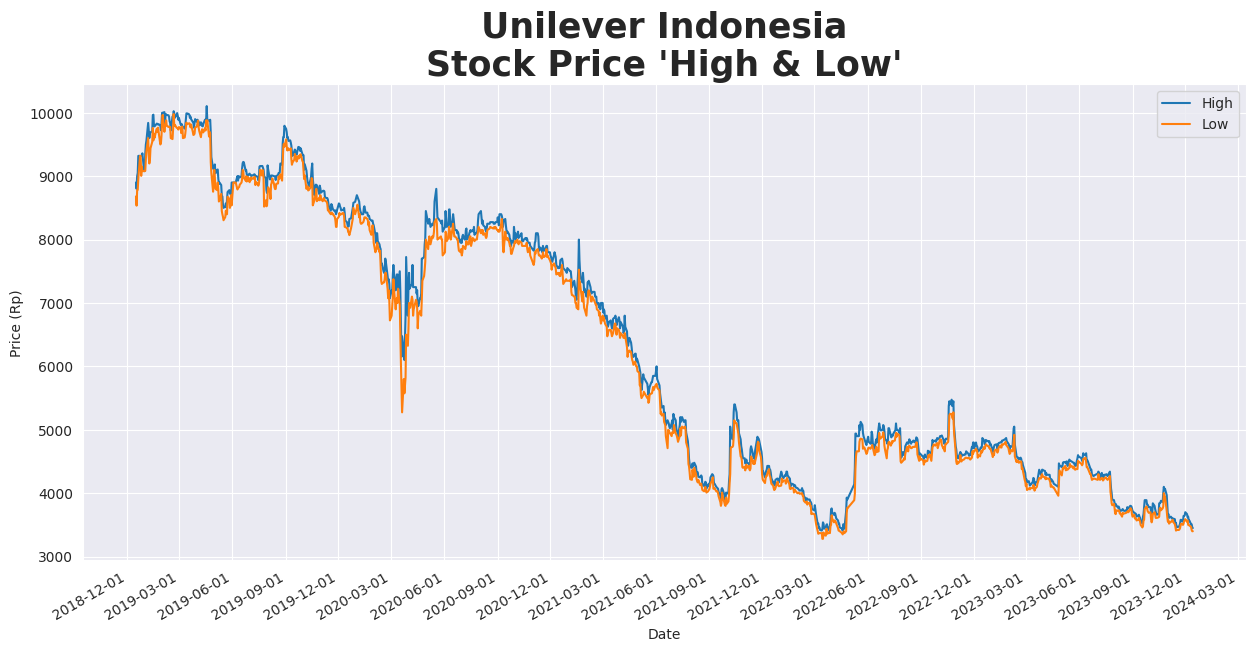

In [ ]:
# Plot stock price 'High & Low'
sns.set_style('darkgrid')
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))
x_dates = df.index.values

plt.plot(x_dates, df['High'], label='High')
plt.plot(x_dates, df['Low'], label='Low')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Unilever Indonesia\nStock Price 'High & Low'", fontsize=25, fontweight='bold')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

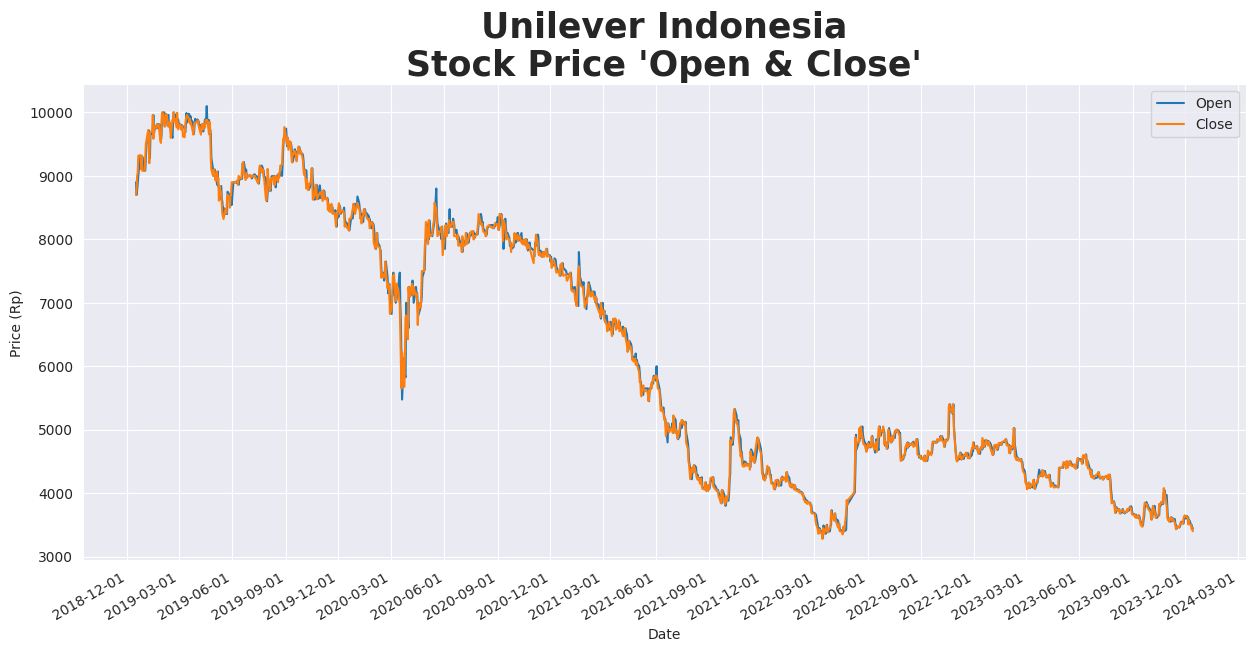

In [ ]:
# Plot stock price 'Open & Close'
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.plot(x_dates, df['Open'], label='Open')
plt.plot(x_dates, df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Unilever Indonesia\nStock Price 'Open & Close'", fontsize=25, fontweight='bold')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

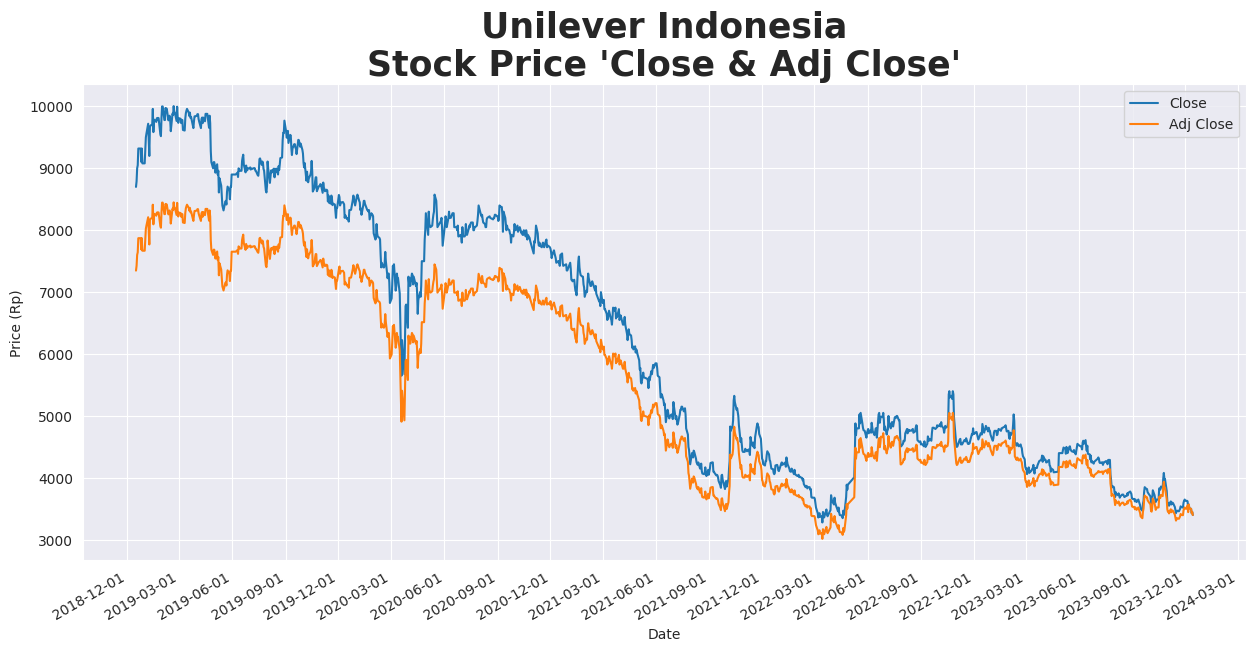

In [ ]:
# Plot stock price 'Close & Adj CLose'
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.plot(x_dates, df['Close'], label='Close')
plt.plot(x_dates, df['Adj Close'], label='Adj Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Unilever Indonesia\nStock Price 'Close & Adj Close'", fontsize=25, fontweight='bold')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

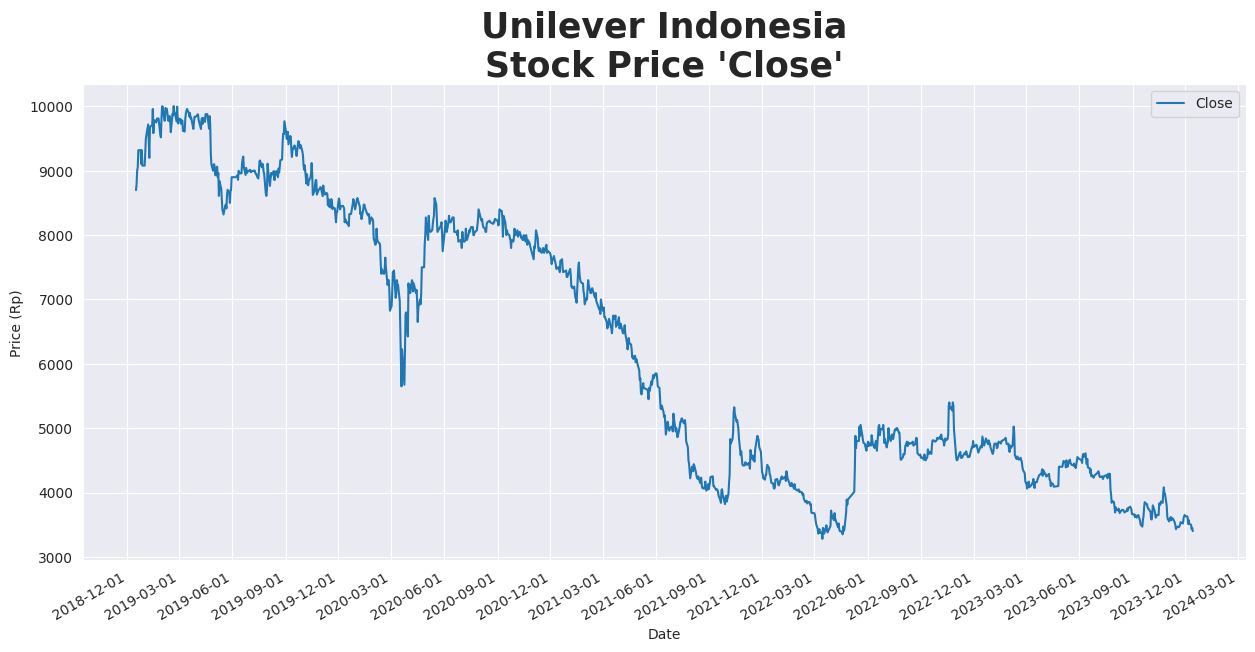

In [ ]:
# Plot stock price 'Close'
plt.figure(figsize=(15,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=3))

plt.plot(x_dates, df['Close'], label='Close')
plt.xlabel('Date')
plt.ylabel('Price (Rp)')
plt.title("Unilever Indonesia\nStock Price 'Close'", fontsize=25, fontweight='bold')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()

# Data Preprocessing

In [ ]:
# Melakukan feature scaling dengan menggunakan MinMaxScaler
ms = MinMaxScaler()
df['Close_ms'] = ms.fit_transform(df[['Close']])

In [ ]:
def split_data(df, train_size):
  size = int(len(df) * train_size)
  train, test = df.iloc[0:size], df.iloc[size:len(df)]
  return train, test

In [ ]:
# Melakukan split data train 80% - test 20%
train, test = split_data(df['Close_ms'], 0.8)

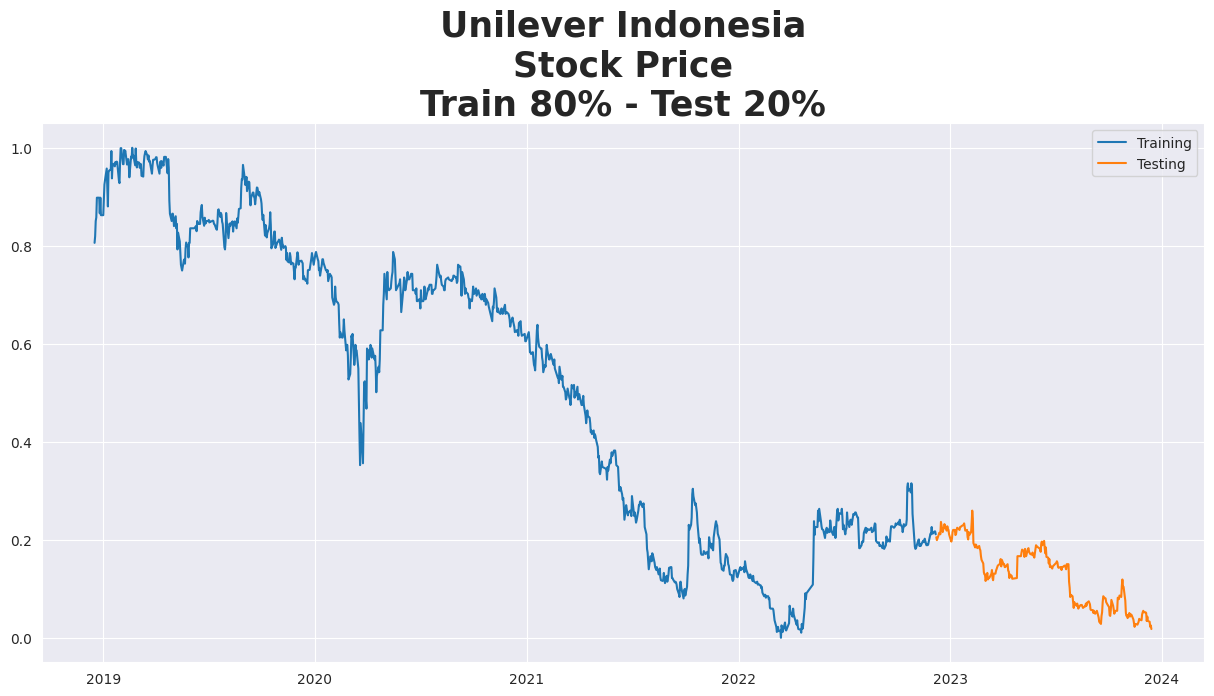

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(train)
plt.plot(test)
plt.legend(labels=['Training', 'Testing'])
plt.title("Unilever Indonesia\nStock Price\nTrain 80% - Test 20%", fontsize=25, fontweight='bold')
plt.show()

In [ ]:
def split_target(df, look_back=1):
    X, y = [], []
    for i in range(len(df) - look_back):
        a = df[i:(i + look_back), 0]
        X.append(a)
        y.append(df[i + look_back, 0])
    return np.array(X), np.array(y)

In [ ]:
X_train, y_train = split_target(train.values.reshape(len(train), 1))
X_test, y_test = split_target(test.values.reshape(len(test), 1))

In [ ]:
X_train = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# **Build the Model**

In [ ]:
# Callbacks
class Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('val_mae') is not None and logs.get('val_mae') < 0.01:
      self.model.stop_training = True

In [ ]:
# Membuat variabel model
model = Sequential([LSTM(128, input_shape=(1, 1), return_sequences=True),
                    Dropout(0.2),
                    LSTM(64),
                    Dropout(0.2),
                    Dense(32, activation='relu'),
                    Dense(1)])

In [ ]:
# Mencetak summary dari model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            66560     
                                                                 
 dropout (Dropout)           (None, 1, 128)            0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 118081 (461.25 KB)
Trainable params: 11808

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              metrics=["mae"],
              loss=tf.keras.losses.Huber())

# **Train Data**

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=200,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    shuffle=False,
                    callbacks=[Callback()])

Epoch 1/200
31/31 [==============================] - 6s 45ms/step - loss: 0.1766 - mae: 0.5096 - val_loss: 0.0081 - val_mae: 0.1096
Epoch 2/200
31/31 [==============================] - 0s 11ms/step - loss: 0.1647 - mae: 0.4876 - val_loss: 0.0060 - val_mae: 0.0906
Epoch 3/200
31/31 [==============================] - 0s 11ms/step - loss: 0.1519 - mae: 0.4634 - val_loss: 0.0043 - val_mae: 0.0739
Epoch 4/200
31/31 [==============================] - 0s 10ms/step - loss: 0.1377 - mae: 0.4356 - val_loss: 0.0028 - val_mae: 0.0627
Epoch 5/200
31/31 [==============================] - 0s 11ms/step - loss: 0.1219 - mae: 0.4032 - val_loss: 0.0019 - val_mae: 0.0549
Epoch 6/200
31/31 [==============================] - 0s 13ms/step - loss: 0.1046 - mae: 0.3684 - val_loss: 0.0020 - val_mae: 0.0524
Epoch 7/200
31/31 [==============================] - 0s 15ms/step - loss: 0.0859 - mae: 0.3304 - val_loss: 0.0035 - val_mae: 0.0680
Epoch 8/200
31/31 [==============================] - 0s 14ms/step - loss: 0.

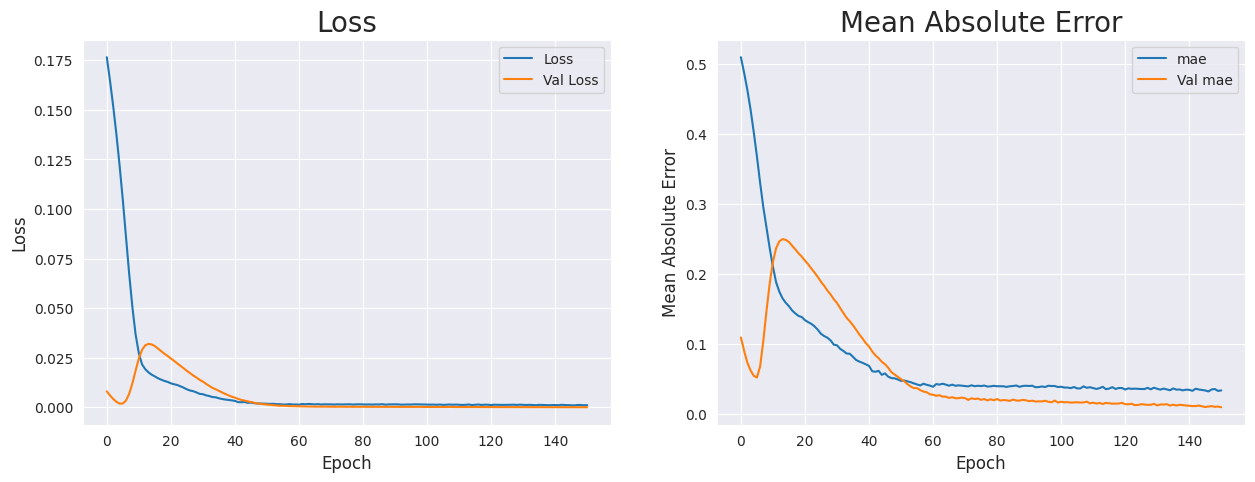

In [ ]:
# Plot grafik Loss dan Mean Absolute Error (MAE)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Loss
ax1.plot(history.history['loss'])
ax1.plot(history.history['val_loss'])
ax1.legend(['Loss','Val Loss'])
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Loss', fontsize=12)
ax1.set_title('Loss', fontsize=20)

# MAE
ax2.plot(history.history['mae'])
ax2.plot(history.history['val_mae'])
ax2.legend(['mae','Val mae'])
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Mean Absolute Error', fontsize=12)
ax2.set_title('Mean Absolute Error', fontsize=20)
plt.show()

# **Predict Data**

8/8 [==============================] - 1s 4ms/step


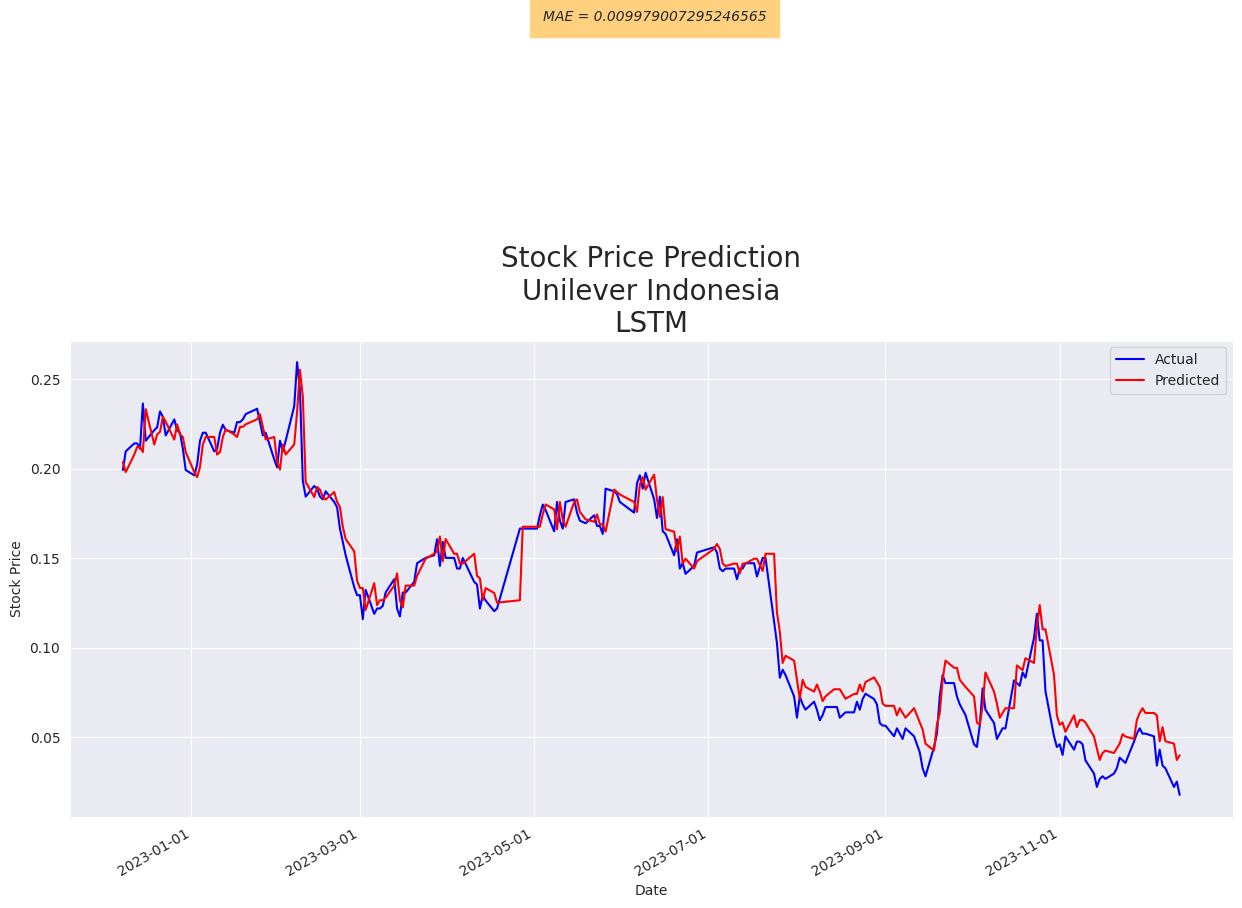

In [ ]:
# Melakukan predict pada test data
pred = model.predict(X_test)
y_pred = np.array(pred).reshape(-1)

# Plot actual and predicted prices
plt.figure(figsize=(15, 7))
plt.plot(test.index[:-1], y_test, color='blue', label='Actual')  # Exclude the last element to match the length
plt.plot(test.index[:-1], y_pred, color='red', label='Predicted')  # Exclude the last element to match the length
plt.text(test.index[95], 0.45, f"MAE = {mean_absolute_error(y_test, y_pred)}", style='italic', bbox={
        'facecolor': 'orange', 'alpha': 0.5, 'pad': 10})
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction\nUnilever Indonesia\nLSTM', fontsize=20)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()
plt.legend()
plt.show()

# **Evaluation Model**

In [ ]:
# Evaluasi model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mape = np.mean(np.mean(np.abs(y_test - y_pred) / y_pred)) * 100
print('MAE : ', mae)
print('MSE :', mse)
print('RSME : ', rmse)
print('MAPE : ', mape, "%")

MAE :  0.009979007295246565
MSE : 0.00015817470471364298
RSME :  0.01257675255038609
MAPE :  10.860189848947464 %


# **Plot All Data with predicted result**

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


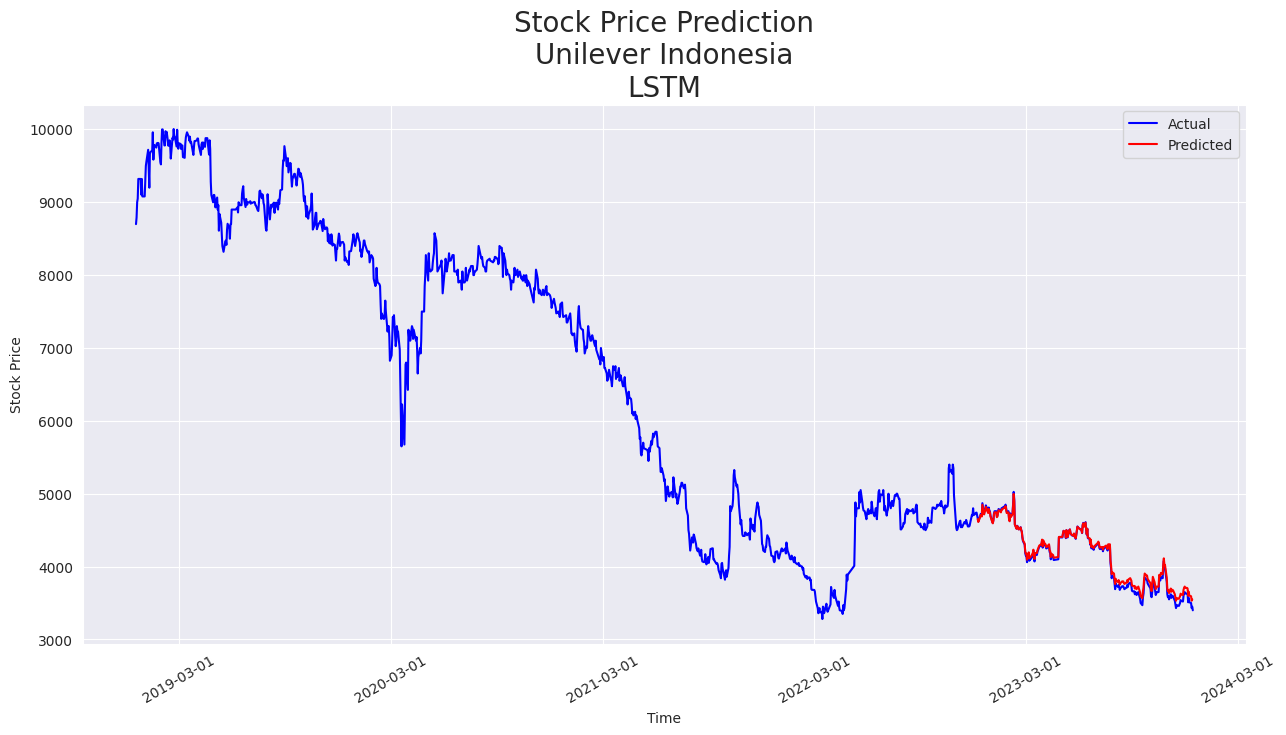

In [ ]:
# Melakukan inverse transform pada predicted values
y_pred_original = ms.inverse_transform(np.array(y_pred).reshape(-1, 1))

# Plot actual and predicted prices
plt.figure(figsize=(15, 7))
plt.plot(df.index, df['Close'], color='blue', label='Actual')
plt.plot(df.index[:-1], [None] * len(train.index) + list(y_pred_original), color='red', label='Predicted')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction\nUnilever Indonesia\nLSTM', fontsize=20)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=12))
# Rotate x-axis labels
plt.xticks(rotation=30)

plt.legend()
plt.show()

In [ ]:
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : y_pred.flatten()})
data1


,Actual,Predicted
0,0.199257,0.203687
1,0.209665,0.198098
2,0.214126,0.207886
3,0.214126,0.212093
4,0.211152,0.212093
...,...,...
241,0.034201,0.055687
242,0.032714,0.047808
243,0.022305,0.046497
244,0.025279,0.037347
